In [9]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

import torch
import glob
from collections import defaultdict

<IPython.core.display.Javascript object>

In [10]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

import seaborn as sns

sns.set(font_scale=1)
sns.set_style("ticks")

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "14"

# Uncomment for local development
%load_ext nb_black
%load_ext autoreload
%autoreload 2

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

In [11]:
def get_data(files, *keys):
    """Get data keys from saved digit exps."""
    data = defaultdict(list)
    for f in files:
        d = torch.load(f)
        for k in keys:
            data[k].append(d[k])

    return data

<IPython.core.display.Javascript object>

In [12]:
files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp155*")
exp155 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp159_s01_*")
exp159_s01 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp159_s05_*")
exp159_s05 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp159_s1_*")
exp159_s1 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp159_s2_*")
exp159_s2 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp161_s3_*")
exp161_s3 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp161_4_*")
exp161_s4 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp161_s5_*")
exp161_s5 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp161_s6_*")
exp161_s6 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp161_s7_*")
exp161_s7 = get_data(files, "correct")

files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp161_s8_*")
exp161_s8 = get_data(files, "correct")

<IPython.core.display.Javascript object>

In [13]:
model_names = [
    "0.00",
    "0.01",
    "0.05",
    "0.10",
    "0.20",
    "0.30",
    "0.40",
    "0.50",
    "0.60",
    "0.70",
    "0.80",
]
models = [
    exp155,
    exp159_s01,
    exp159_s05,
    exp159_s1,
    exp159_s2,
    exp161_s3,
    exp161_s4,
    exp161_s5,
    exp161_s6,
    exp161_s7,
    exp161_s8,
]

# Sanity check
assert len(model_names) == len(models)

<IPython.core.display.Javascript object>

In [14]:
# -------------------------------------------------
# Est stats
medians = [np.median(exp["correct"]) for exp in models]

means = [np.mean(exp["correct"]) for exp in models]
stds = [np.std(exp["correct"]) for exp in models]

assert len(means) == len(models)

<IPython.core.display.Javascript object>

### Means

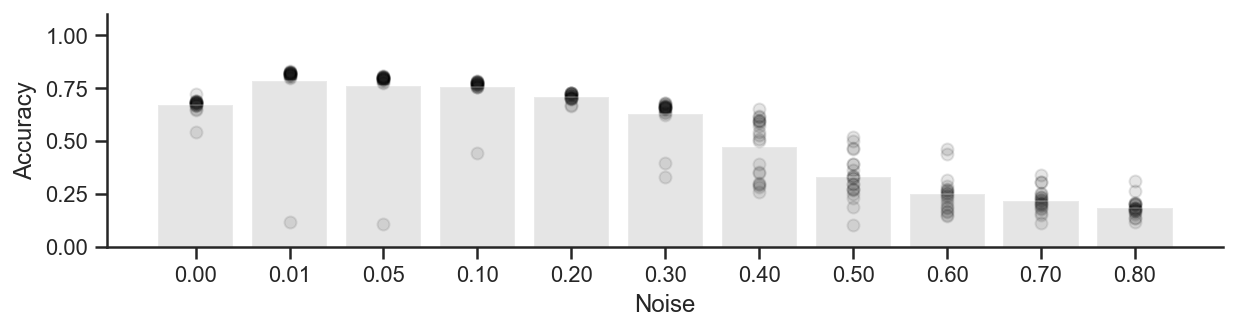

<IPython.core.display.Javascript object>

In [15]:
fig = plt.figure(figsize=(10, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

# Mean
plt.subplot(grid[0, 0])
plt.bar(model_names, medians, color="grey", alpha=0.2, width=0.8)
for name, model in zip(model_names, models):
    n = len(model["correct"])
    plt.scatter(x=np.repeat(name, n), y=model["correct"], color="black", alpha=0.1)
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.xlabel("Noise")
_ = sns.despine()

### Median

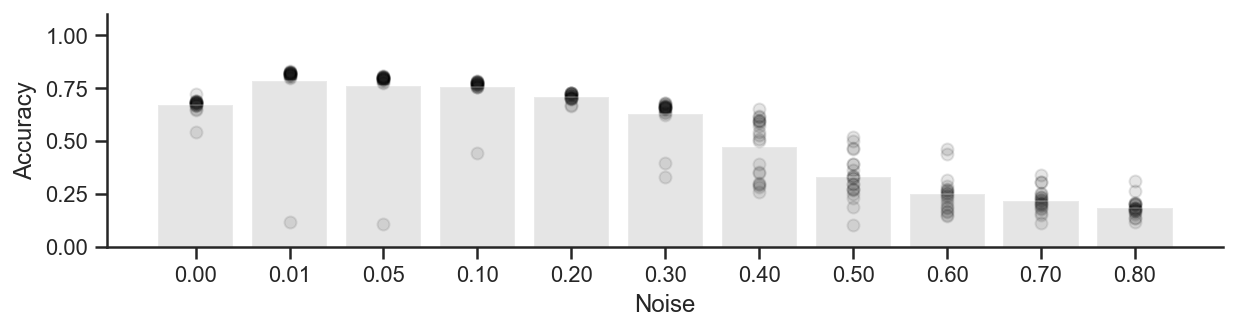

<IPython.core.display.Javascript object>

In [16]:
fig = plt.figure(figsize=(10, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[1, 0])
plt.bar(model_names, means, color="grey", alpha=0.2, width=0.8)
for name, model in zip(model_names, models):
    n = len(model["correct"])
    plt.scatter(x=np.repeat(name, n), y=model["correct"], color="black", alpha=0.1)
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.xlabel("Noise")
_ = sns.despine()